In [1]:
%matplotlib inline

In [2]:
import gym
import numpy as np
import random as pr
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

env = gym.make("FrozenLake-v0")

learning_rate = 0.1
input_size = env.observation_space.n
output_size = env.action_space.n
dis = .99
num_episodes = 2000

# input: 16, output: 4, bias: 4 ==> 68
model = tf.keras.Sequential([
    Dense(output_size, input_shape=[input_size],
         kernel_initializer=tf.random_uniform_initializer(minval=0,maxval=0.01)) 
])
#model.compile(optimizer="sgd", loss='mse')
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 68        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [6]:
def one_hot(x):
    return np.identity(16)[x:x+1]
    
with tf.device('/GPU:0'):
    rList=[]
    for i in range(num_episodes):
        s = env.reset()
        e = 1.0 / ((i/50)+10)
        rAll = 0
        done = False
        local_loss = []

        while not done:
            Qs = model.predict(one_hot(s))
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)

            s1, reward, done, _ = env.step(a)
            if done:
                Qs[0, a] = reward
            else:
                Qs1 = model.predict(one_hot(s1))
                Qs[0, a] = reward + dis*np.max(Qs1)

            model.fit(x=one_hot(s), y=Qs, verbose=0)

            rAll += reward
            s= s1
            
        print(f"Episode: {i, rAll}")
        #print(rAll)
            
        rList.append(rAll)

Episode: (0, 0.0)
Episode: (1, 0.0)
Episode: (2, 0.0)
Episode: (3, 0.0)
Episode: (4, 0.0)
Episode: (5, 0.0)
Episode: (6, 0.0)
Episode: (7, 0.0)
Episode: (8, 0.0)
Episode: (9, 0.0)
Episode: (10, 0.0)
Episode: (11, 0.0)
Episode: (12, 1.0)
Episode: (13, 0.0)
Episode: (14, 0.0)
Episode: (15, 0.0)
Episode: (16, 0.0)
Episode: (17, 0.0)
Episode: (18, 0.0)
Episode: (19, 0.0)
Episode: (20, 0.0)
Episode: (21, 0.0)
Episode: (22, 0.0)
Episode: (23, 0.0)
Episode: (24, 0.0)
Episode: (25, 0.0)
Episode: (26, 0.0)
Episode: (27, 0.0)
Episode: (28, 0.0)
Episode: (29, 0.0)
Episode: (30, 0.0)
Episode: (31, 0.0)
Episode: (32, 0.0)
Episode: (33, 0.0)
Episode: (34, 0.0)
Episode: (35, 0.0)
Episode: (36, 0.0)
Episode: (37, 0.0)
Episode: (38, 0.0)
Episode: (39, 0.0)
Episode: (40, 0.0)
Episode: (41, 0.0)
Episode: (42, 0.0)
Episode: (43, 0.0)
Episode: (44, 0.0)
Episode: (45, 0.0)
Episode: (46, 0.0)
Episode: (47, 0.0)
Episode: (48, 0.0)
Episode: (49, 0.0)
Episode: (50, 0.0)
Episode: (51, 0.0)
Episode: (52, 0.0)
Epi

Percent of successful episode: 0.351%


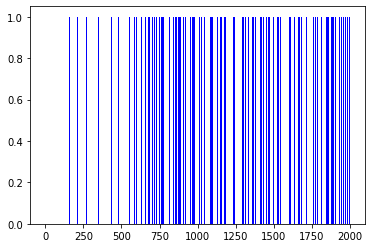

In [7]:
print("Percent of successful episode: "+str(sum(rList)/num_episodes)+"%")
plt.bar(range(len(rList)), rList, color='blue')
plt.show()